<a href="https://colab.research.google.com/github/lucasfranca016/BootcampDataScience/blob/main/modulo3/mod3_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime as dt
from datetime import timedelta
from matplotlib.dates import MonthLocator, DateFormatter
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.tsa.stattools as smt

In [ ]:
dados = pd.read_csv('dados_covid_sp.csv',sep = ';')

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [ ]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<AxesSubplot:xlabel='datahora', ylabel='casos'>

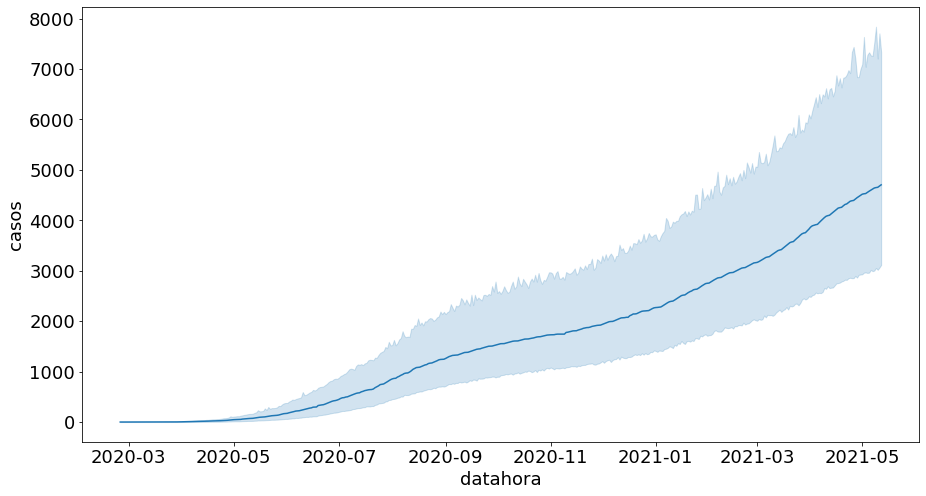

In [ ]:
sns.lineplot(x='datahora', y='casos',data=dados)

In [ ]:
eixo_x = np.linspace(-2, 2, 100)

In [ ]:
y_exp = np.exp(eixo_x)

<AxesSubplot:>

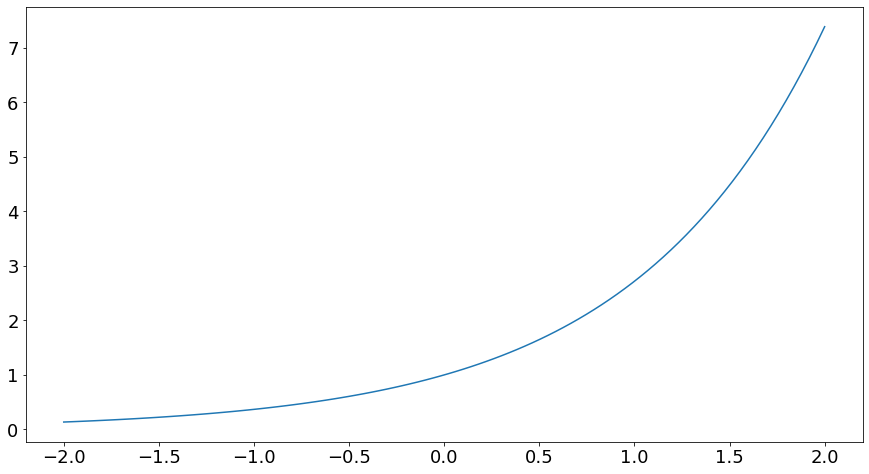

In [ ]:
sns.lineplot(x = eixo_x, y=y_exp)

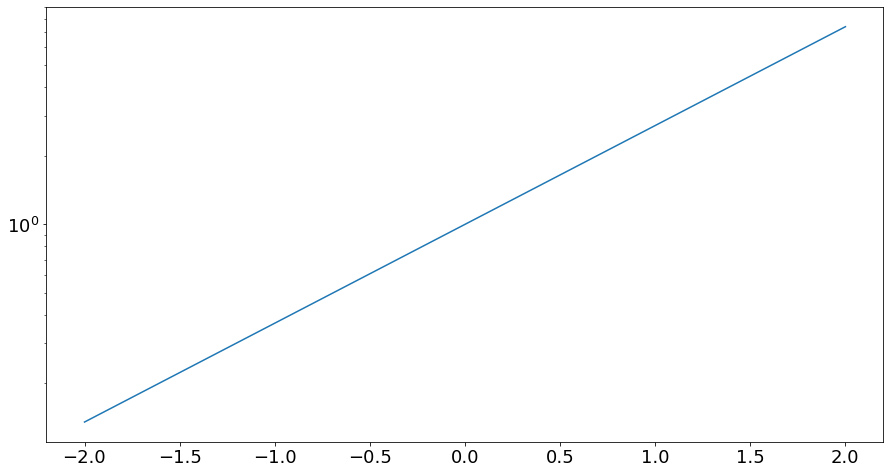

In [ ]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [ ]:
dados_sp = dados.query('nome_munic == "São Paulo"')

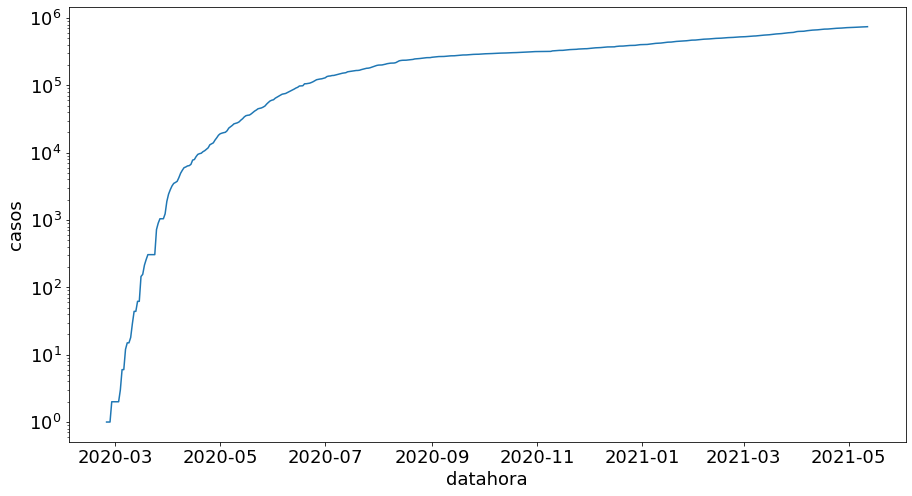

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)
mpl.pyplot.yscale('log')

# Desafio 1 : Filtrar a base com alguma outra função

# Desafio 2 : Escolher outro município para fazer a análise.

In [ ]:
#Desafio 1:

dados_jund = dados[dados['nome_munic'].eq('Jundiaí')]
dados_jund

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
293,Jundiaí,3525904,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,407016,69839,43121,0,8.0,"-23,1852","-46,8974",9
938,Jundiaí,3525904,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,407016,69839,43121,0,8.0,"-23,1852","-46,8974",9
1583,Jundiaí,3525904,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,407016,69839,43121,0,8.0,"-23,1852","-46,8974",9
2228,Jundiaí,3525904,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,407016,69839,43121,0,8.0,"-23,1852","-46,8974",9
2873,Jundiaí,3525904,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,407016,69839,43121,0,8.0,"-23,1852","-46,8974",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282803,Jundiaí,3525904,8,5,2021-05-08,36058,81,"8,859111e+03","110,2857143",1073,...,Campinas,3,407016,69839,43121,>5000,1.0,"-23,1852","-46,8974",18
283448,Jundiaí,3525904,9,5,2021-05-09,36232,174,"8,901861e+03","119,2857143",1079,...,Campinas,3,407016,69839,43121,>5000,1.0,"-23,1852","-46,8974",19
284093,Jundiaí,3525904,10,5,2021-05-10,36252,20,"8,906775e+03","117,0000000",1083,...,Campinas,3,407016,69839,43121,>5000,1.0,"-23,1852","-46,8974",19
284738,Jundiaí,3525904,11,5,2021-05-11,36393,141,"8,941418e+03","121,2857143",1089,...,Campinas,3,407016,69839,43121,>5000,1.0,"-23,1852","-46,8974",19


<AxesSubplot:xlabel='datahora', ylabel='casos'>

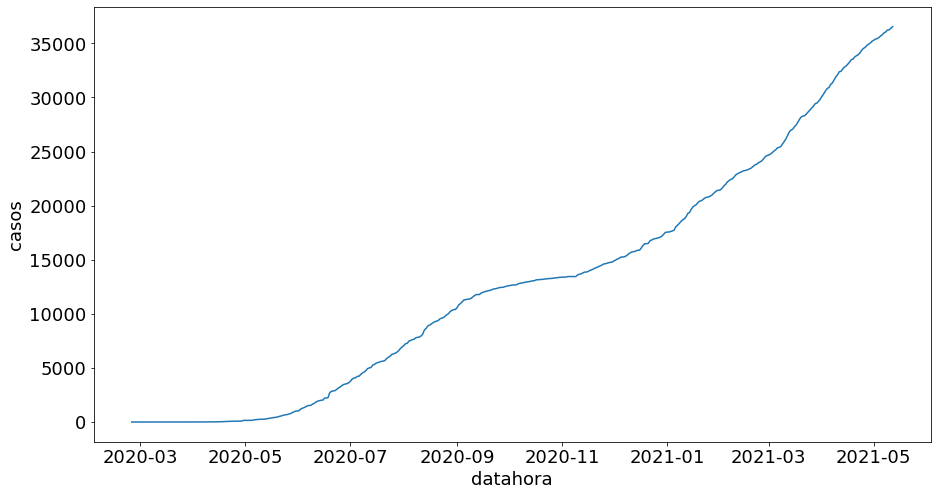

In [ ]:
#Desafio 2:

sns.lineplot(x='datahora',y='casos',data=dados_jund)

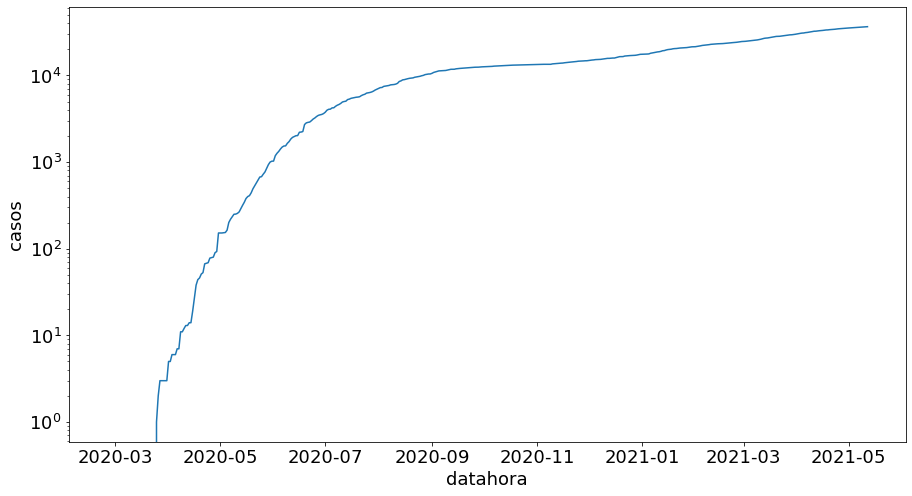

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados_jund)
mpl.pyplot.yscale('log')

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

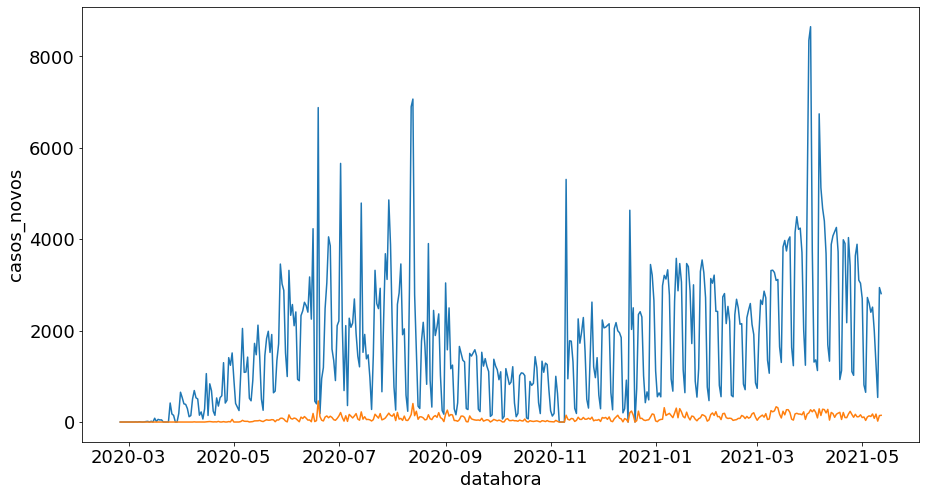

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='casos_novos', data=dados_jund)

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

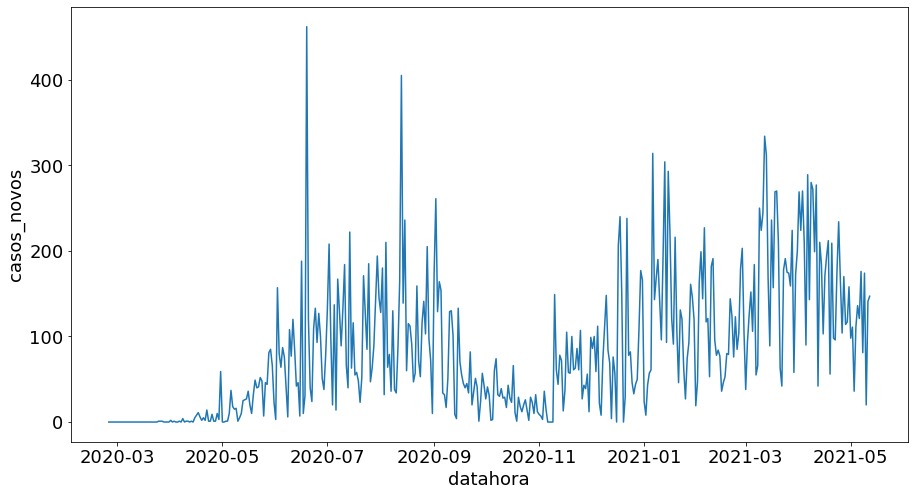

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_jund)

In [ ]:
#diferenciação:
dados_exemplo = pd.DataFrame(data = np.linspace(1,10,10))
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


<AxesSubplot:xlabel='0', ylabel='0'>

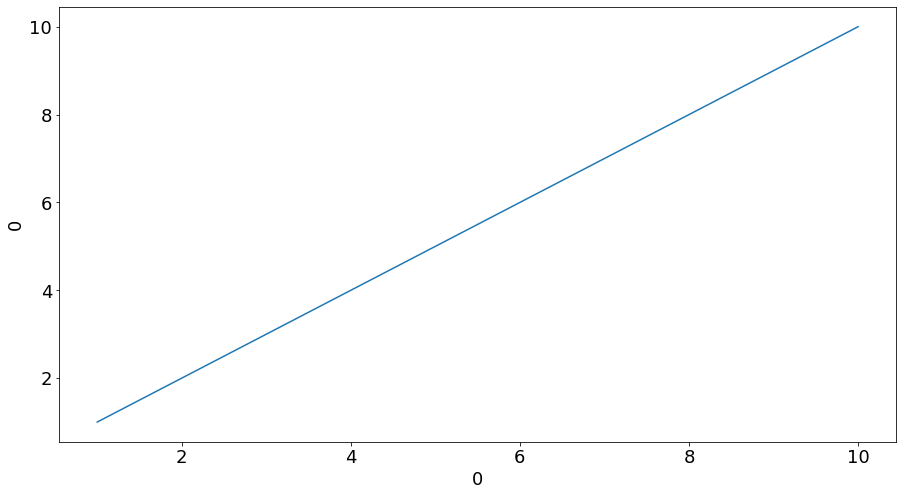

In [ ]:
sns.lineplot(data=dados_exemplo, x=dados_exemplo[0], y=dados_exemplo[0])

In [ ]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

<AxesSubplot:xlabel='0', ylabel='0'>

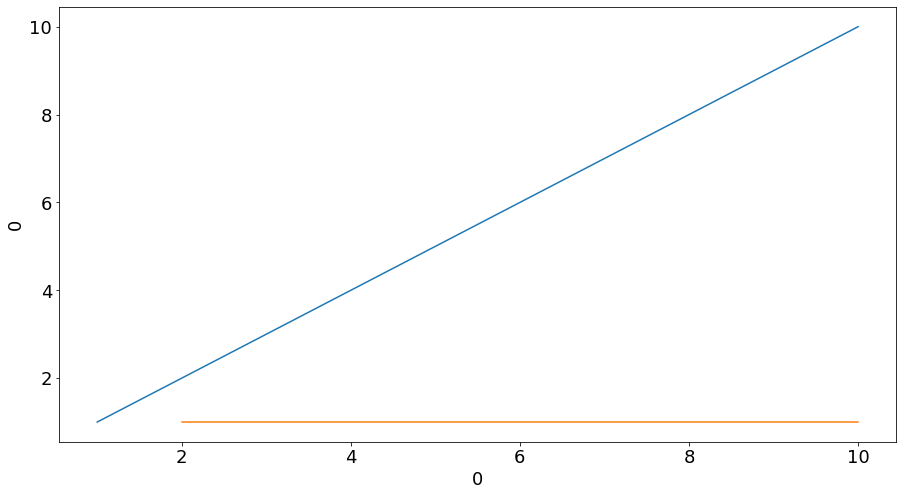

In [ ]:
sns.lineplot(data=dados_exemplo, x=dados_exemplo[0], y=dados_exemplo[0])
sns.lineplot(data=dados_exemplo, x=dados_exemplo[0], y='diferenciado')

In [ ]:
dados_sp.loc[:,'derivada_casos'] = dados_sp.loc[:,'casos_novos'].diff()
dados_sp.loc[:,'derivada_obitos'] = dados_sp.loc[:,'obitos_novos'].diff()
dados_jund.loc[:,'derivada_casos'] = dados_jund.loc[:,'casos_novos'].diff()
dados_jund.loc[:,'derivada_obitos'] = dados_jund.loc[:,'obitos_novos'].diff()

/home/lulu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lulu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='datahora', ylabel='derivada_casos'>

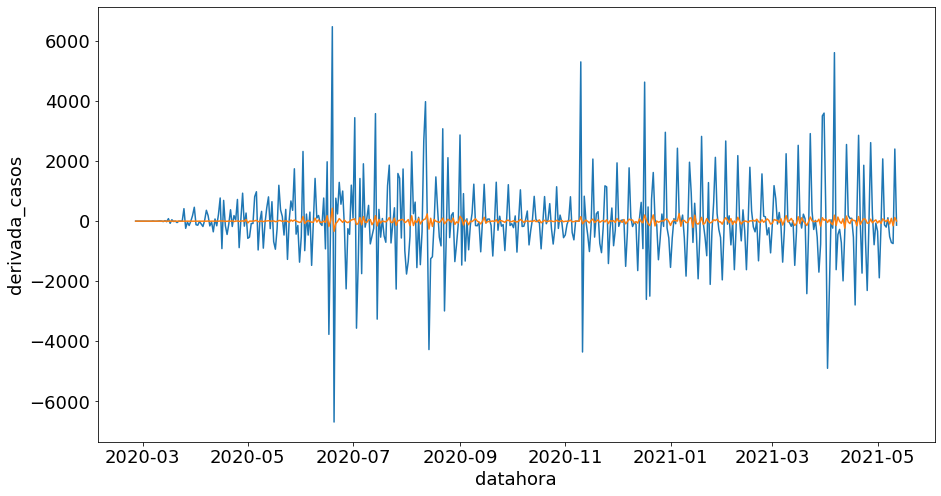

In [ ]:
sns.lineplot(x='datahora', y='derivada_casos', data=dados_sp)
sns.lineplot(x='datahora', y='derivada_casos', data=dados_jund)

<AxesSubplot:xlabel='datahora', ylabel='derivada_casos'>

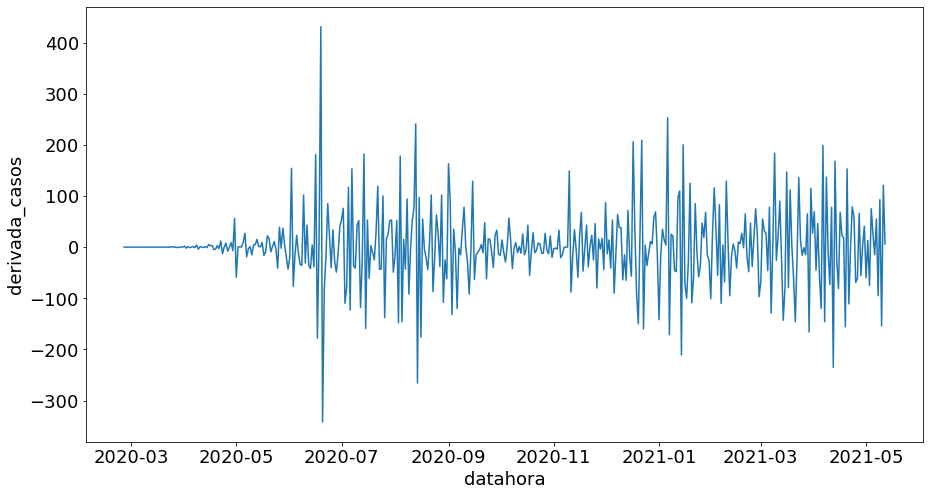

In [ ]:
sns.lineplot(x='datahora', y='derivada_casos', data=dados_jund)

<AxesSubplot:xlabel='datahora', ylabel='derivada_obitos'>

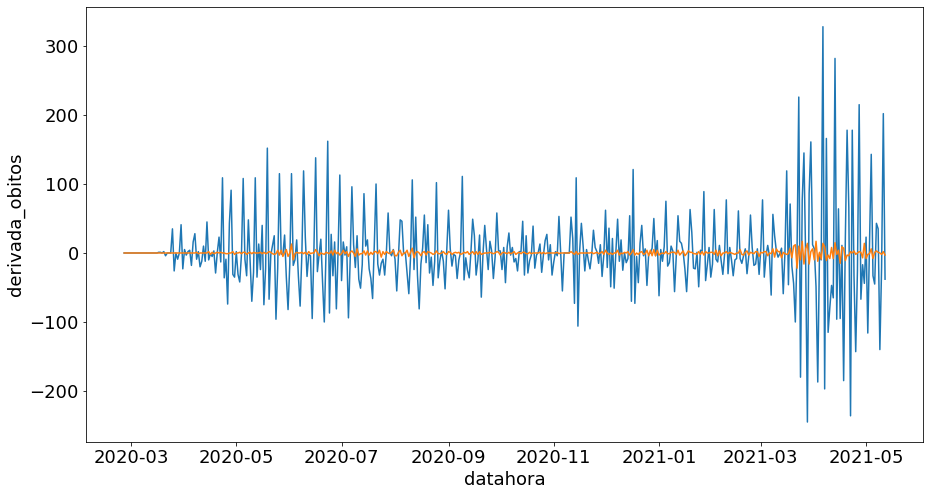

In [ ]:
sns.lineplot(x='datahora', y='derivada_obitos', data=dados_sp)
sns.lineplot(x='datahora', y='derivada_obitos', data=dados_jund)

<AxesSubplot:xlabel='datahora', ylabel='derivada_obitos'>

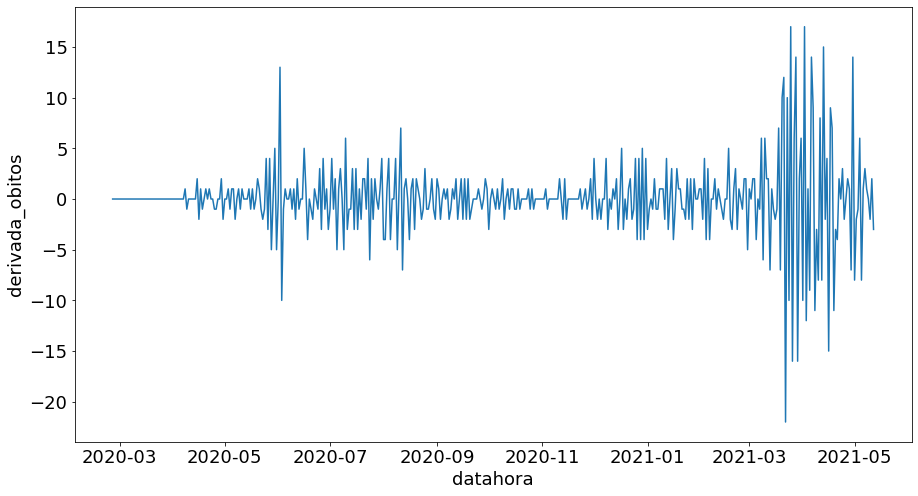

In [ ]:
sns.lineplot(x='datahora', y='derivada_obitos', data=dados_jund)

### Desafio 2: Ver se os picos das derivadas de óbitos coincide com a derivada dos casos:

Nos gráficos de SP vemos que não e nos de Jundiaí observamos um padrão um pouco diferente em relação à derivada da taxa de óbitos novos, contudo, os picos ainda não batem com a derivada da taxa de novos casos.

Como num gráfico de linha ele liga os pontos, podemos ter a impressão de estar ocorrendo uma variação que na realidade não está acontecendo, assim, faremos um gráfico de barras para melhor visualizar.

<BarContainer object of 443 artists>

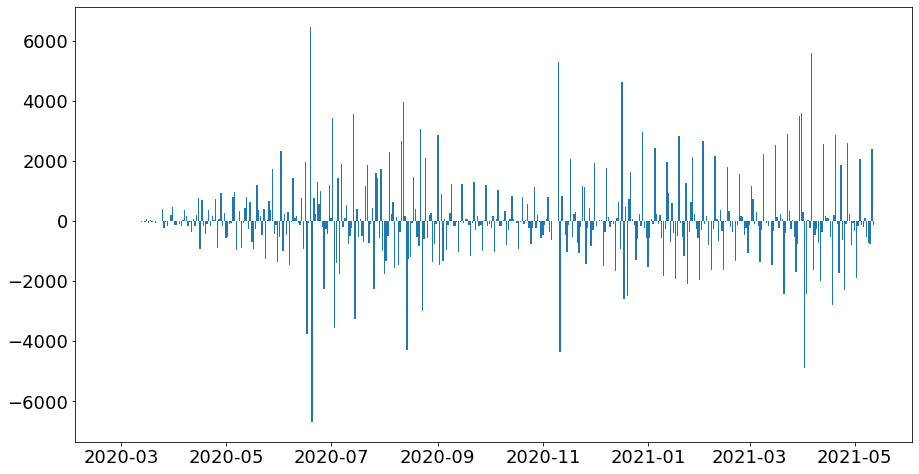

In [ ]:
plt.bar(dados_sp['datahora'], dados_sp['derivada_casos'])

<BarContainer object of 443 artists>

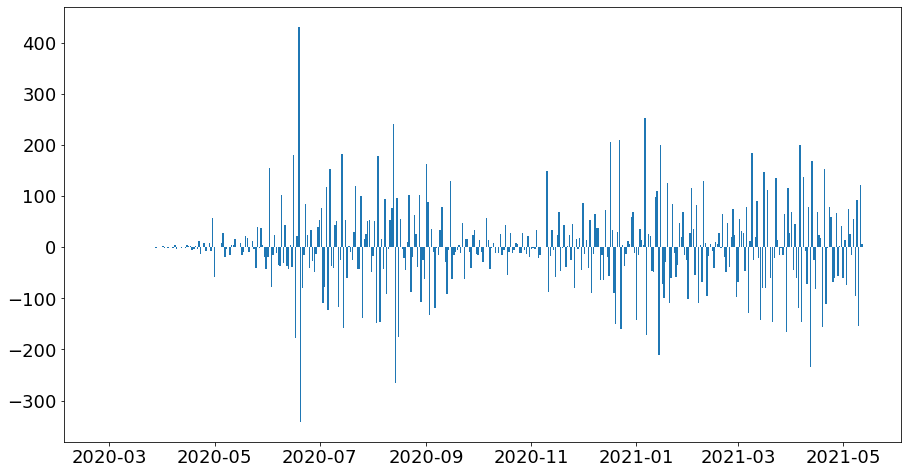

In [ ]:
plt.bar(dados_jund['datahora'], dados_jund['derivada_casos'])

In [ ]:
dados_sp.loc[:,'ano'] = pd.DatetimeIndex(dados_sp.loc[:,'datahora']).year
dados_jund.loc[:,'ano'] = pd.DatetimeIndex(dados_jund.loc[:,'datahora']).year

/home/lulu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lulu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
dados_2021_sp = dados_sp.query('ano == 2021')
dados_2021_jund = dados_jund.query('ano == 2021')

<BarContainer object of 132 artists>

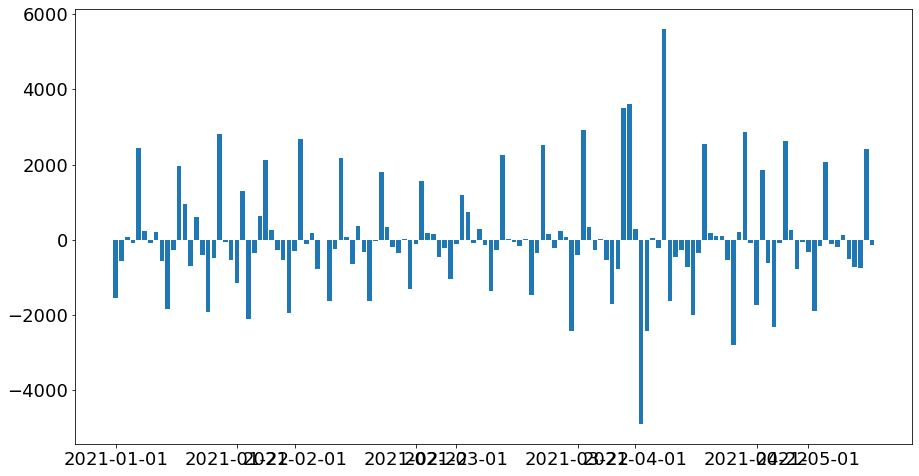

In [ ]:
plt.bar(dados_2021_sp['datahora'], dados_2021_sp['derivada_casos'])

<BarContainer object of 132 artists>

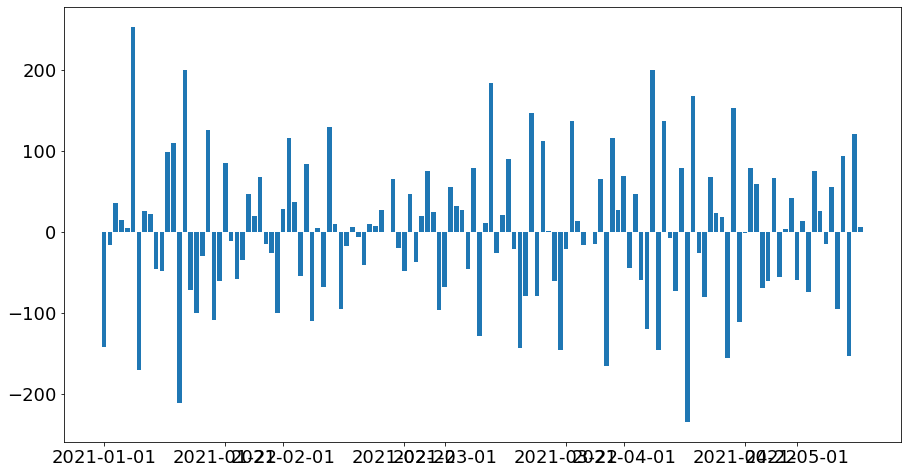

In [ ]:
plt.bar(dados_2021_jund['datahora'], dados_2021_jund['derivada_casos'])

### Desafio 3 : Melhorar os gráficos.

In [ ]:
dados_sp.loc[:,'media_movel_casos'] = dados_sp.loc[:,'casos_novos'].rolling(window=7, center=False).mean()
dados_sp.loc[:,'media_movel_obitos'] = dados_sp.loc[:,'obitos_novos'].rolling(window=7, center=False).mean()
dados_jund.loc[:,'media_movel_casos'] = dados_jund.loc[:,'casos_novos'].rolling(window=7, center=False).mean()
dados_jund.loc[:,'media_movel_obitos'] = dados_jund.loc[:,'obitos_novos'].rolling(window=7, center=False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

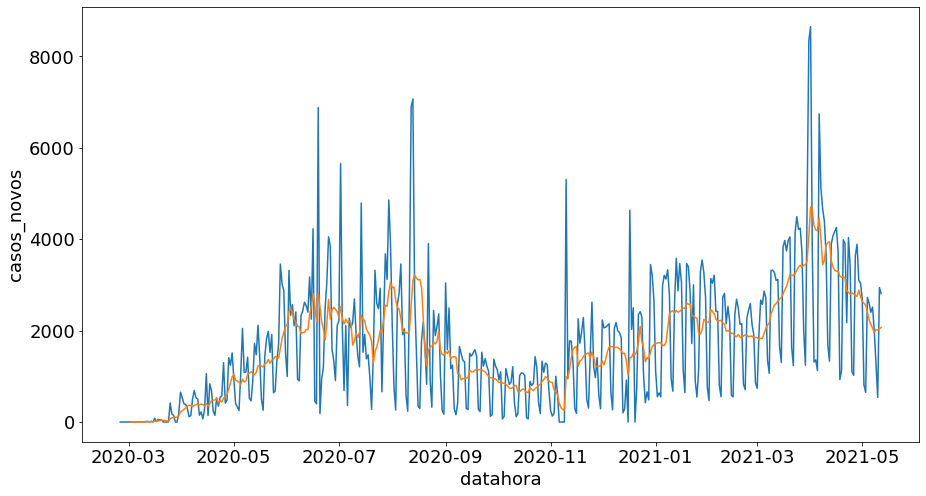

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)


A média móvel suaviza efeitos de sazonalidade: nós estamos lidando com dados reportados, então, os dados de um dia podem ser só notificados 5 dias depois, criando picos, logo, usando a média móvel podemos retirar um pouco desses efeitos de picos e ter uma melhor análise.

### Desafio 4 : Gráfico média móvel de óbitos. Mudar os gráficos de casos de linha para barra.

In [ ]:
dados_sp.loc[:,'mes'] = pd.DatetimeIndex(dados_sp.loc[:,'datahora']).month
dados_jund.loc[:,'mes'] = pd.DatetimeIndex(dados_jund.loc[:,'datahora']).month
dados_sp.loc[:,'datahora'] = dados_sp.loc[:,'datahora'].astype('datetime64')
dados_jund.loc[:,'datahora'] = dados_jund.loc[:,'datahora'].astype('datetime64')

/home/lulu/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


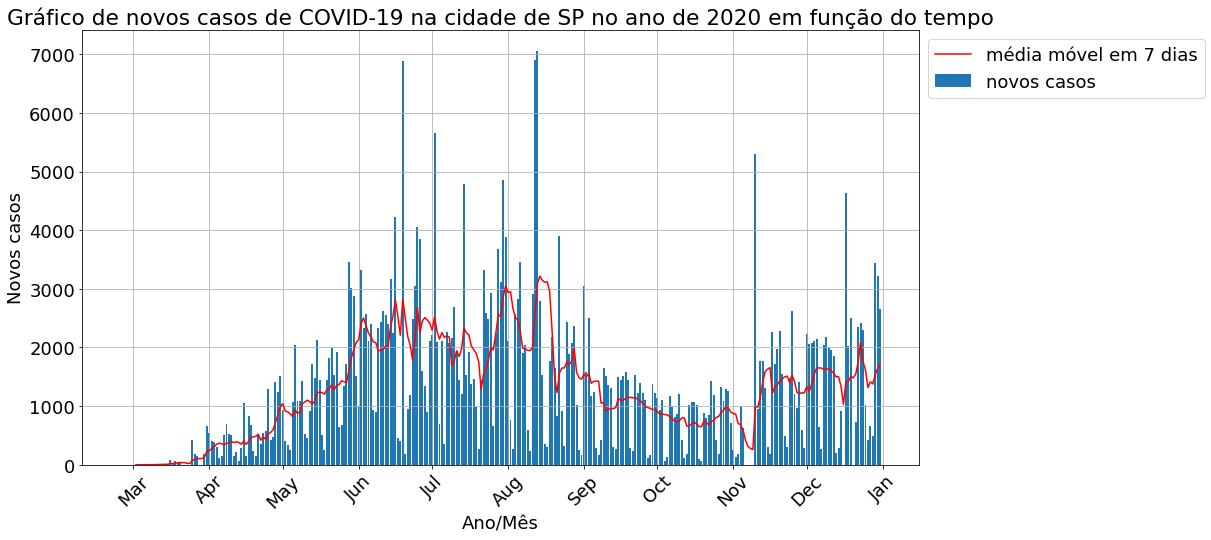

In [ ]:
plt.bar(dados_sp.query('ano == 2020')['datahora'],dados_sp.query('ano == 2020')['casos_novos'],
       label='novos casos')
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp.query('ano == 2020'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos casos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos casos de COVID-19 na cidade de SP no ano de 2020 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

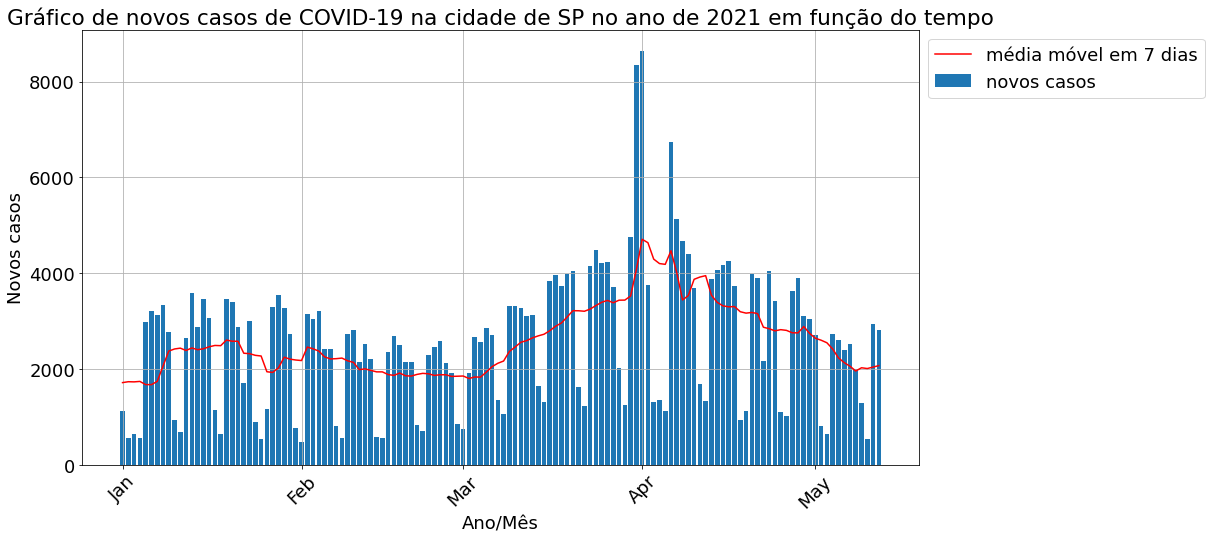

In [ ]:
plt.bar(dados_sp.query('ano == 2021')['datahora'],dados_sp.query('ano == 2021')['casos_novos'],
       label='novos casos')
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp.query('ano == 2021'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos casos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos casos de COVID-19 na cidade de SP no ano de 2021 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

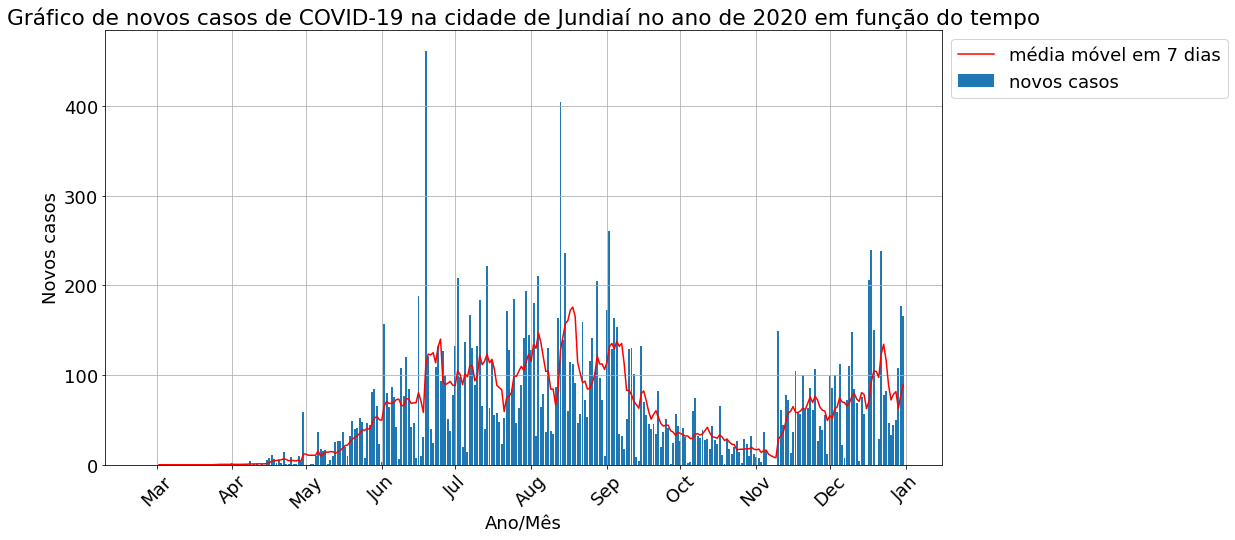

In [ ]:
plt.bar(dados_jund.query('ano == 2020')['datahora'],dados_jund.query('ano == 2020')['casos_novos'],
       label='novos casos')
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_jund.query('ano == 2020'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos casos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos casos de COVID-19 na cidade de Jundiaí no ano de 2020 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

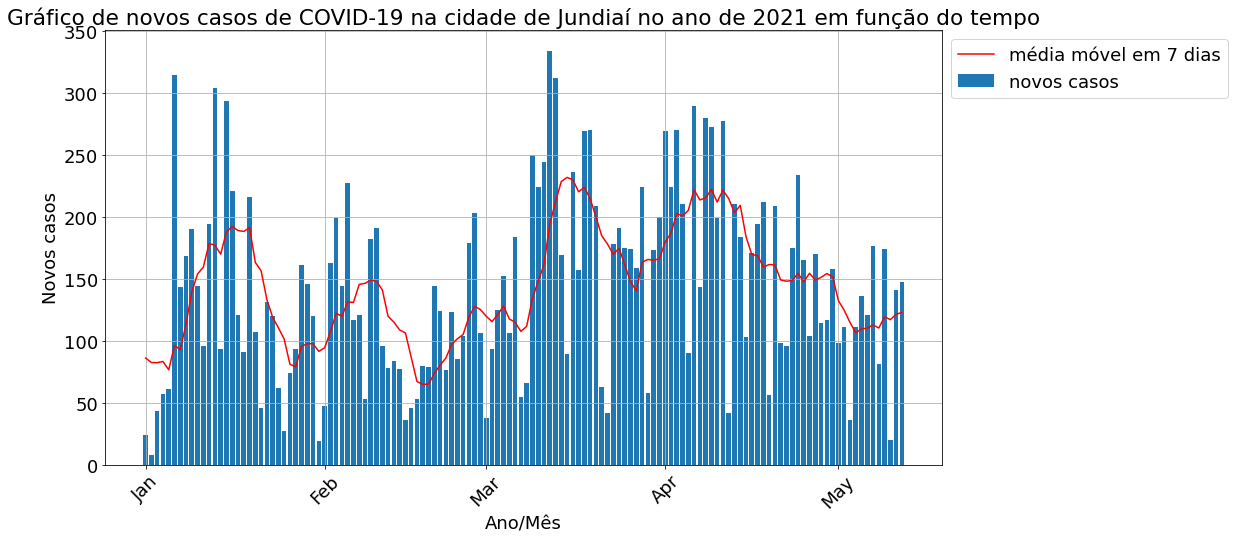

In [ ]:
plt.bar(dados_jund.query('ano == 2021')['datahora'],dados_jund.query('ano == 2021')['casos_novos'],
       label='novos casos')
ax = sns.lineplot(x='datahora', y='media_movel_casos', data=dados_jund.query('ano == 2021'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos casos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos casos de COVID-19 na cidade de Jundiaí no ano de 2021 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.xticks(rotation=45)
plt.grid()
plt.show()

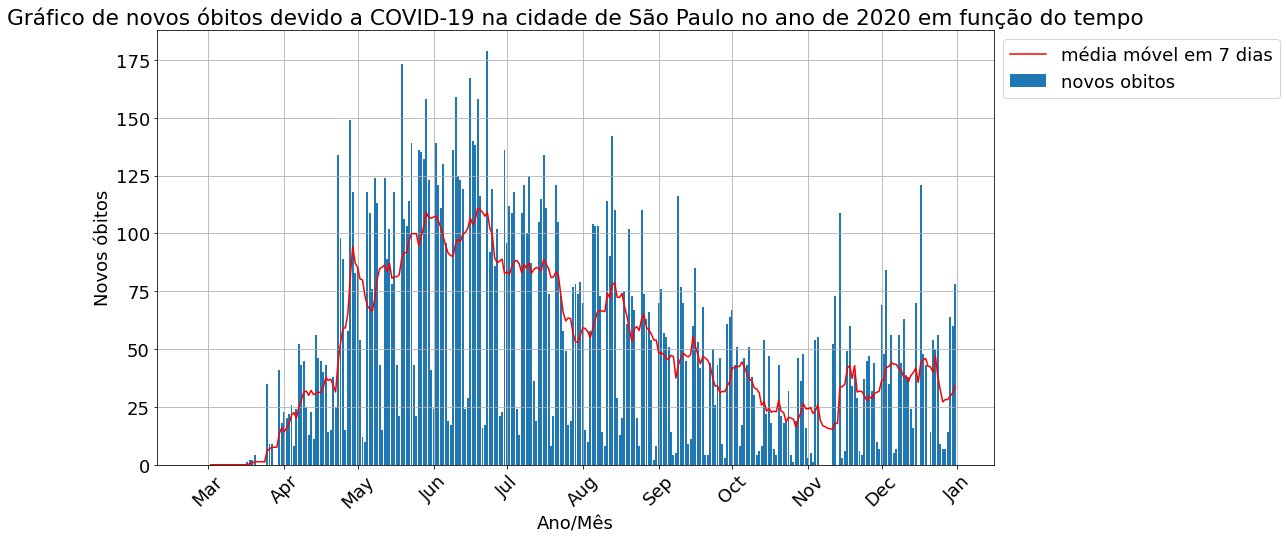

In [ ]:
plt.bar(dados_sp.query('ano == 2020')['datahora'],dados_sp.query('ano == 2020')['obitos_novos'],
       label='novos obitos')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp.query('ano == 2020'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos óbitos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos óbitos devido a COVID-19 na cidade de São Paulo no ano de 2020 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

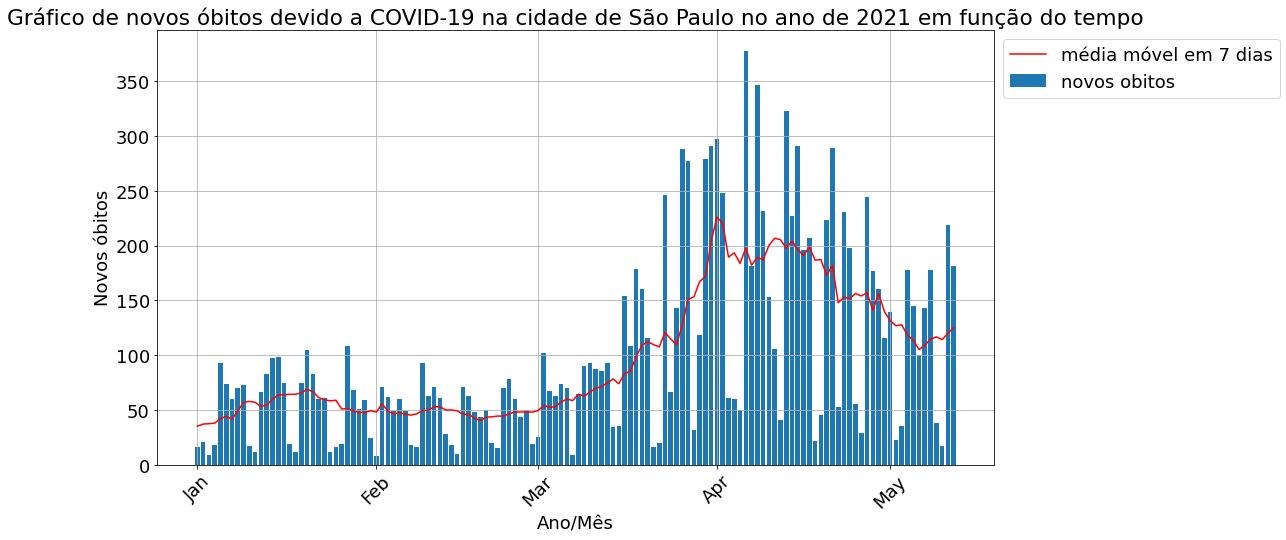

In [ ]:
plt.bar(dados_sp.query('ano == 2021')['datahora'],dados_sp.query('ano == 2021')['obitos_novos'],
       label='novos obitos')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp.query('ano == 2021'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos óbitos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos óbitos devido a COVID-19 na cidade de São Paulo no ano de 2021 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

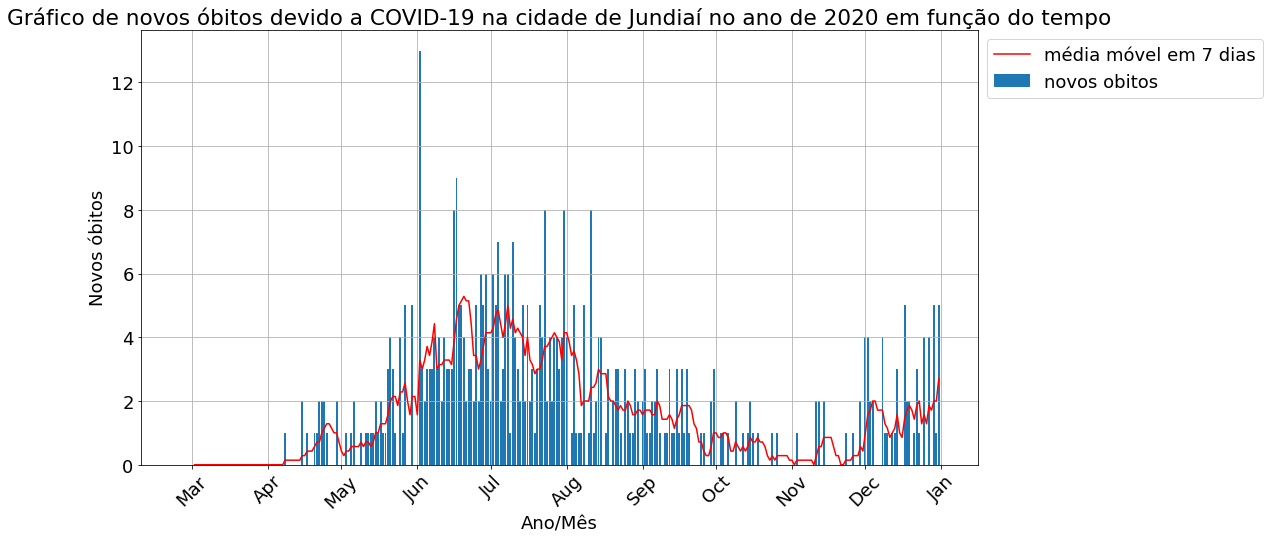

In [ ]:
plt.bar(dados_jund.query('ano == 2020')['datahora'],dados_jund.query('ano == 2020')['obitos_novos'],
       label='novos obitos')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_jund.query('ano == 2020'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos óbitos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos óbitos devido a COVID-19 na cidade de Jundiaí no ano de 2020 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

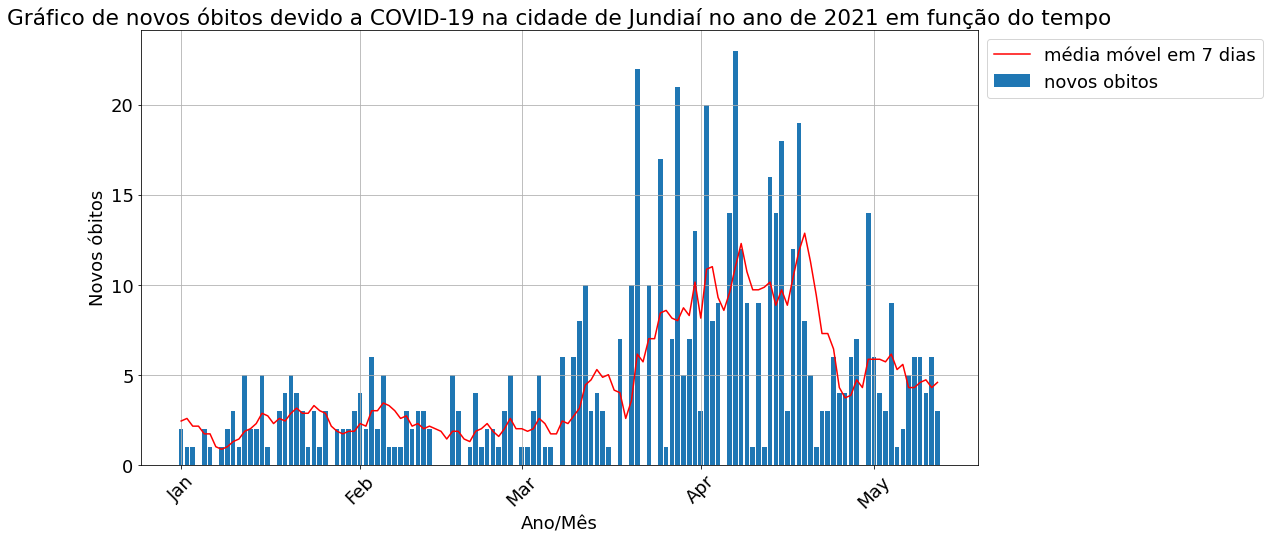

In [ ]:
plt.bar(dados_jund.query('ano == 2021')['datahora'],dados_jund.query('ano == 2021')['obitos_novos'],
       label='novos obitos')
ax = sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_jund.query('ano == 2021'), color='red',
                 label='média móvel em 7 dias')
plt.ylabel('Novos óbitos')
plt.xlabel('Ano/Mês')
plt.title('Gráfico de novos óbitos devido a COVID-19 na cidade de Jundiaí no ano de 2021 em função do tempo')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
plt.grid()
plt.show()

Aqui eu dividi os gráficos de óbitos nos anos de 2020 e 2021 para melhor visualização e plotei para as cidades de são paulo e jundiaí.

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

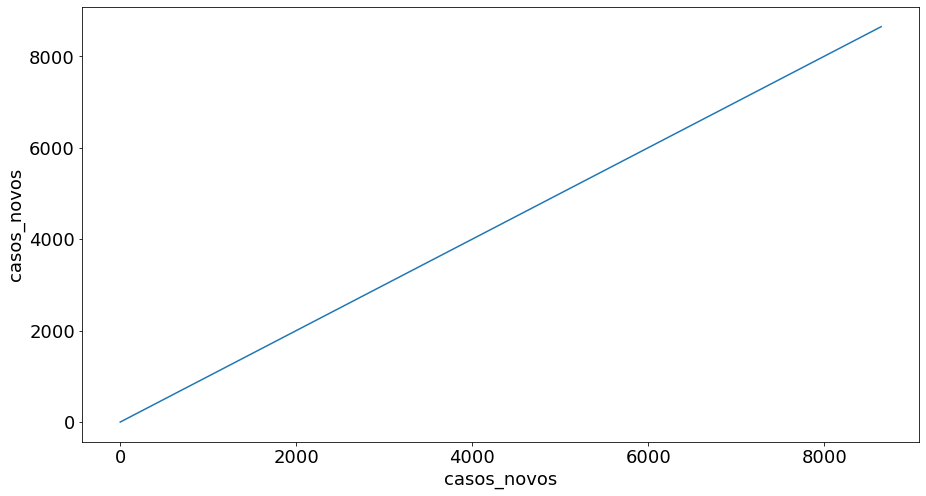

In [ ]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dados_sp)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

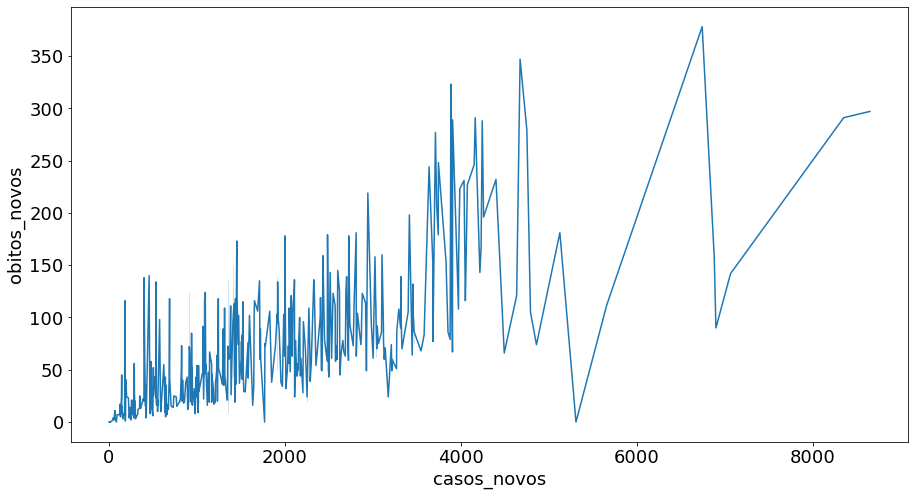

In [ ]:
sns.lineplot(x=dados_sp.loc[:,'casos_novos'],y=dados_sp.loc[:,'obitos_novos'], data=dados_sp)

### Desafio 5: Mover o número de óbitos alguns dias e verificar o gráfico de correlação.

In [ ]:
col1 = dados_sp[7:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-7]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-7]['datahora'].reset_index()['datahora']
obitos_movidos = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
obitos_movidos

,obitos_novos,casos_novos,datahora
0,0,0,2020-02-25
1,0,0,2020-02-26
2,0,0,2020-02-27
3,0,1,2020-02-28
4,0,0,2020-02-29
...,...,...,...
431,178,2700,2021-05-01
432,38,812,2021-05-02
433,17,650,2021-05-03
434,219,2724,2021-05-04


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

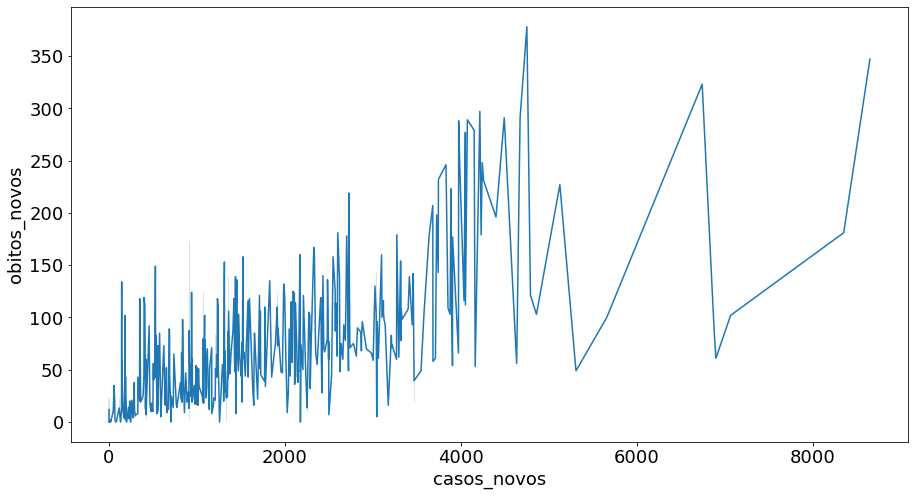

In [ ]:
sns.lineplot(x=obitos_movidos.loc[:,'casos_novos'],y=obitos_movidos.loc[:,'obitos_novos'], data=obitos_movidos)


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

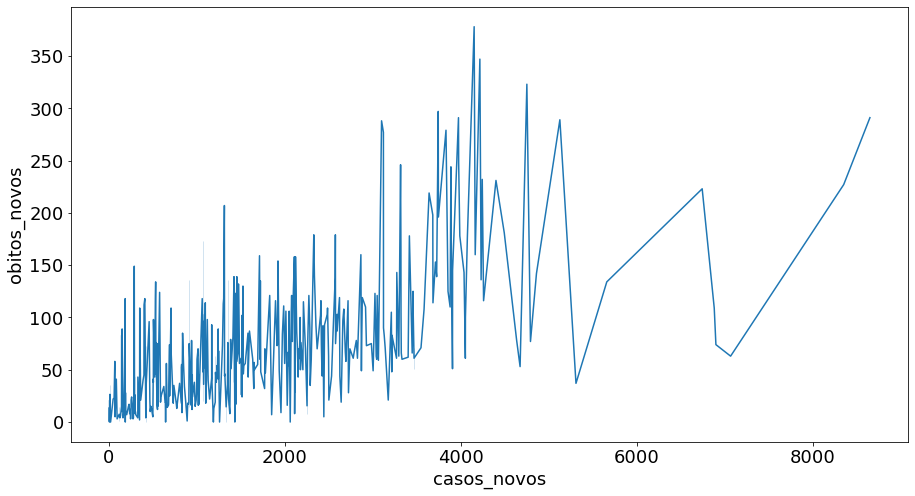

In [ ]:
col1 = dados_sp[14:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-14]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-14]['datahora'].reset_index()['datahora']
obitos_movidos2 = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
sns.lineplot(x=obitos_movidos2.loc[:,'casos_novos'],y=obitos_movidos2.loc[:,'obitos_novos'], data=obitos_movidos2)


Movendo os óbitos 1 semana e 2 semanas adiante não mudou em quase nada o padrão de correlação entre as duas variáveis.

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

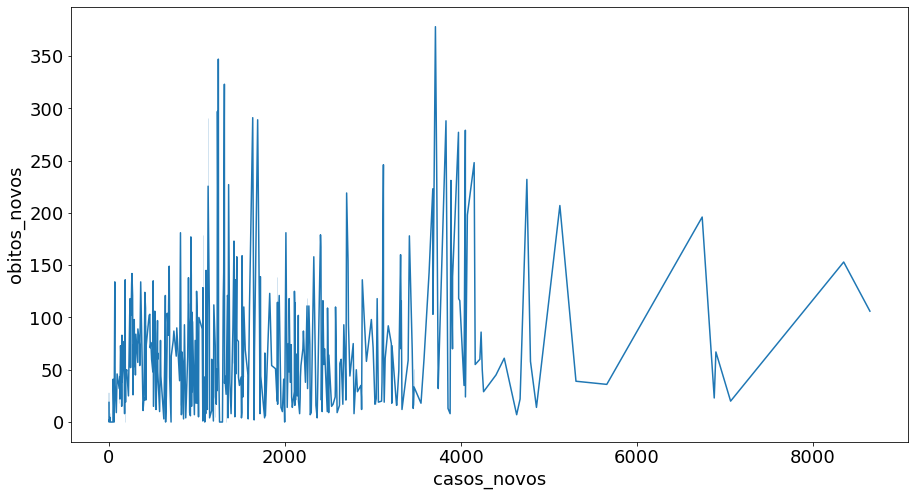

In [ ]:
col1 = dados_sp[10:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-10]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-10]['datahora'].reset_index()['datahora']
obitos_movidos3 = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
sns.lineplot(x=obitos_movidos3.loc[:,'casos_novos'],y=obitos_movidos3.loc[:,'obitos_novos'], data=obitos_movidos3)


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

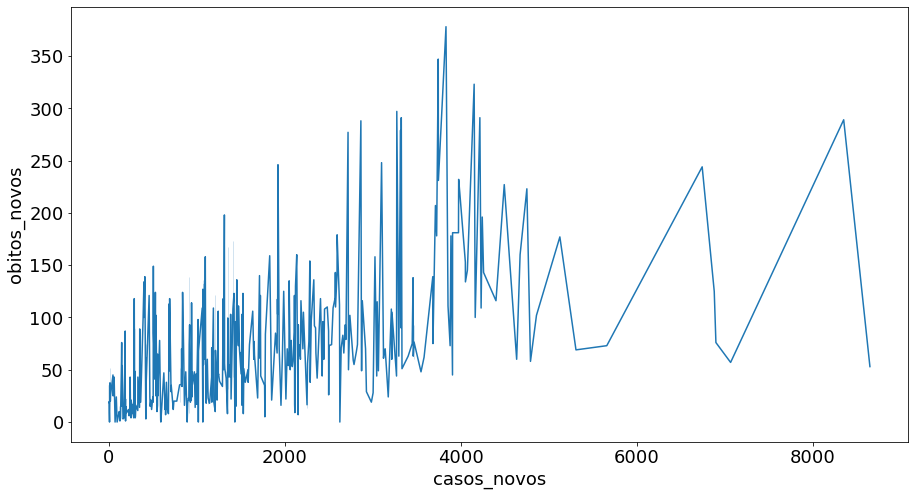

In [ ]:
col1 = dados_sp[21:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-21]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-21]['datahora'].reset_index()['datahora']
obitos_movidos4 = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
sns.lineplot(x=obitos_movidos4.loc[:,'casos_novos'],y=obitos_movidos4.loc[:,'obitos_novos'], data=obitos_movidos4)


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

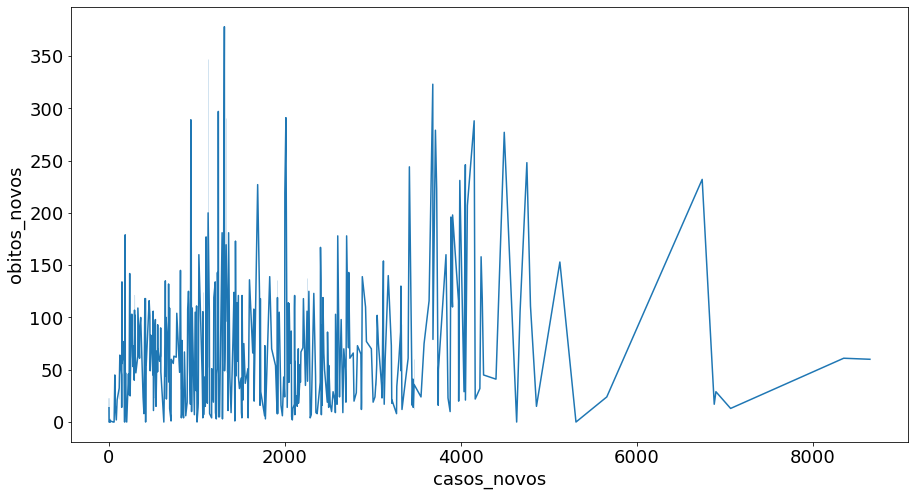

In [ ]:
col1 = dados_sp[3:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-3]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-3]['datahora'].reset_index()['datahora']
obitos_movidos5 = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
sns.lineplot(x=obitos_movidos5.loc[:,'casos_novos'],y=obitos_movidos5.loc[:,'obitos_novos'], data=obitos_movidos5)


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

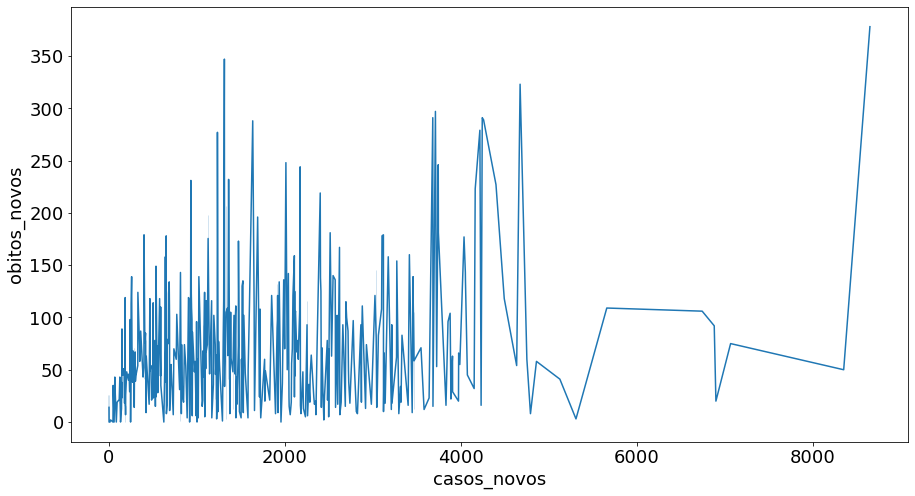

In [ ]:
col1 = dados_sp[5:]['obitos_novos'].reset_index()['obitos_novos']
col2 = dados_sp[:-5]['casos_novos'].reset_index()['casos_novos']
col3 = dados_sp[:-5]['datahora'].reset_index()['datahora']
obitos_movidos6 = pd.DataFrame({'obitos_novos':col1, 'casos_novos':col2, 'datahora':col3})
sns.lineplot(x=obitos_movidos6.loc[:,'casos_novos'],y=obitos_movidos6.loc[:,'obitos_novos'], data=obitos_movidos6)


Testando para 3, 5 e 21 dias de deslocamento na coluna de óbito parece que o padrão pouco muda, mudando somente a inclinação do padrão.

In [ ]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

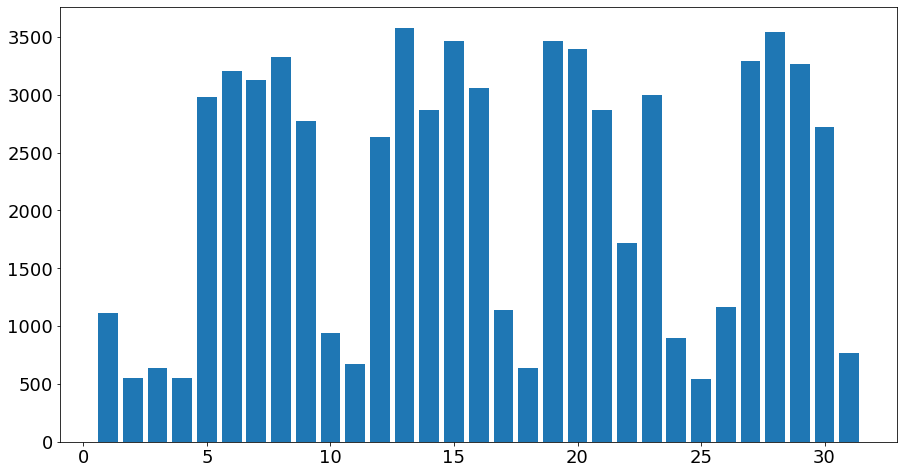

<BarContainer object of 28 artists>

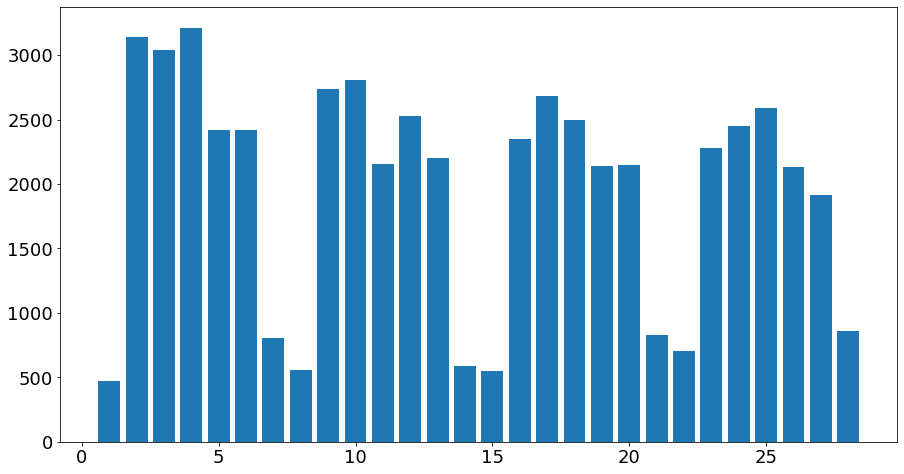

In [ ]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])

Podemos ver que há um padrão de sazonalidade: há 5 dias com uma notificação de casos bem alto e em seguida 2 dias com uma notificação bem baixa. Podemos levantar a hipótese de que esses 2 dias sejam os finais de semana e que também , por 25 de janeiro ter essa baixa, que essas baixas ocorrem em feriados. Nem sempre é tal fácil enxergar um padrão de sazionalidade como fizemos, assim, temos uma função do pandas pra tentar encontrar uma função de autocorrelação.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

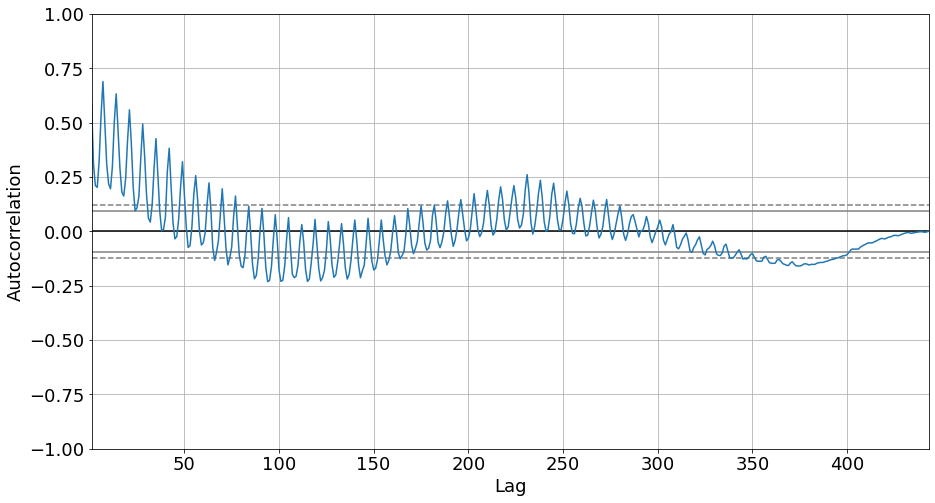

In [ ]:
autocorrelation_plot(dados_sp['casos_novos'])

Gráf em lags. Para construir esse gráfico nós pegamos a série temporal de casos novos e botamos uma cópia dela logo embaixo, é a copia dela pq é uma auto-correlação, multiplicando cada um dos termos pelo seu respectivo dia e depois soma os valores, assim, é calculado o valor do primeiro lag, em seguida movemos a série de baixo e multiplicamos os termos com um dia de delay, contruindo assim o segundo lag, então vamos movendo a série e fazendo essas multiplicações e somas para constuir cada um dos lags. 

Quando temos uma correlação perfeita, ou seja, o gráfico está totalmente embaixo da cópia dele temos um valor bem alto de autocorrelação, então, conforme fossemos movendo e se os valores fossem aleatórios na série temporal a autocorrelação tenderia à zero. Como temos uma sazionalidade enxergaremos pequenas cópias e nesse caso específico continuaremos enxergando valores altos no gráfico de auto-correlação.

Vamos verifcar esse gráfico para uma série totalmente aleatória.

In [ ]:
dados_sp.shape

(443, 31)

In [ ]:
aleatorio = np.random.rand(433)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

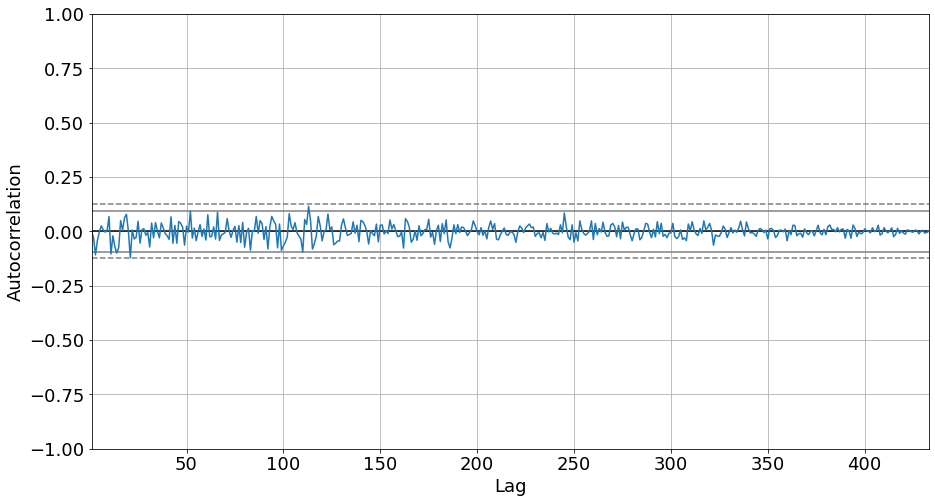

In [ ]:
autocorrelation_plot(aleatorio)

Vemos então que todos os valores estão muito próximos de 0 oq indica que não há uma sazonalidade.

Voltando ao gráfico anterior, interpretamos que o ponto atual da pandemia não é mais comparável, temporalmente, ao ponto do início da pandemia.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

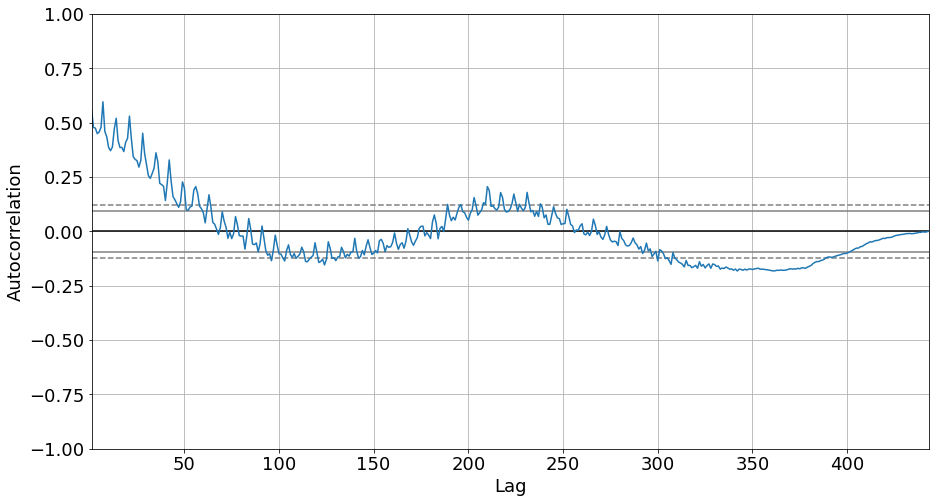

In [ ]:
autocorrelation_plot(dados_jund['casos_novos'])

### Desafio 6: Calcular a correlação cruzada do número de óbitos com o  número de casos. biblioteca statsmodels.

### Desafio 7: Estudar outro município : já estou fazendo.

In [ ]:
md = smf.mixedlm("casos_novos ~ obitos_novos", dados_sp, groups=dados_sp["nome_munic"])
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   casos_novos
No. Observations:    443       Method:               REML       
No. Groups:          1         Scale:                936715.7772
Min. group size:     443       Log-Likelihood:       -3667.9048 
Max. group size:     443       Converged:            Yes        
Mean group size:     443.0                                      
----------------------------------------------------------------
               Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------
Intercept       608.131  970.065  0.627 0.531 -1293.161 2509.423
obitos_novos     16.452    0.722 22.799 0.000    15.038   17.866
Group Var    936715.777                                         



/home/lulu/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/home/lulu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/lulu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


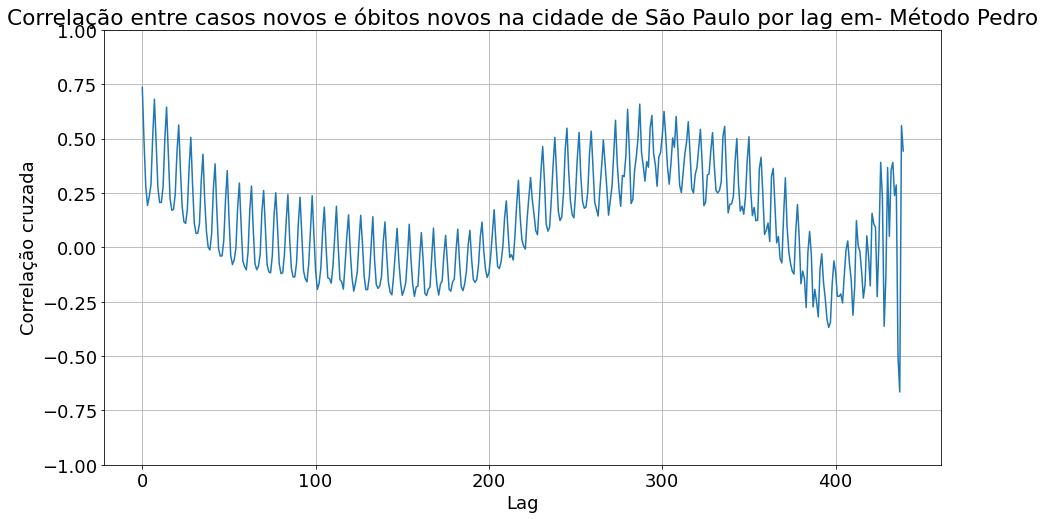

In [ ]:
def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(-lag))

y_corr = [crosscorr(dados_sp['casos_novos'], dados_sp['obitos_novos'], lag) for lag in range(0,len(dados_sp))]
x_lag = range(0,len(dados_sp))
plt.plot(x_lag, y_corr)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos na cidade de São Paulo por lag em- Método Pedro')
plt.xlabel('Lag')
plt.ylabel('Correlação cruzada')
plt.grid()
plt.show()

In [ ]:
ccf_out = smt.ccf(dados_sp.loc[:,"casos_novos"], dados_sp.loc[:,"obitos_novos"], unbiased = False)

<ipython-input-62-7d3d891c42aa>:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  ccf_out = smt.ccf(dados_sp.loc[:,"casos_novos"], dados_sp.loc[:,"obitos_novos"], unbiased = False)


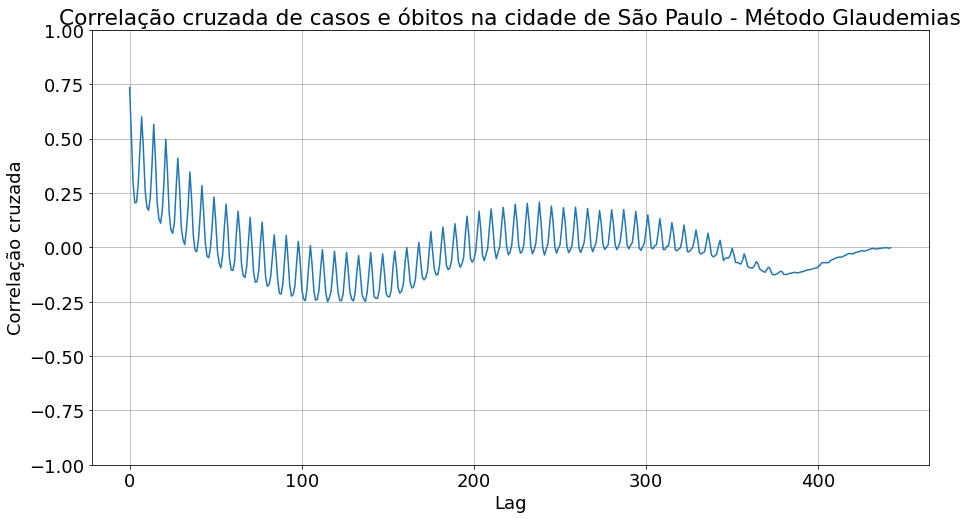

In [ ]:
plt.title("Correlação cruzada de casos e óbitos na cidade de São Paulo - Método Glaudemias")
plt.plot(x_lag, ccf_out)
plt.ylim(-1,1)
plt.ylabel("Correlação cruzada")
plt.xlabel("Lag")
plt.grid()
plt.show()

/home/lulu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/lulu/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


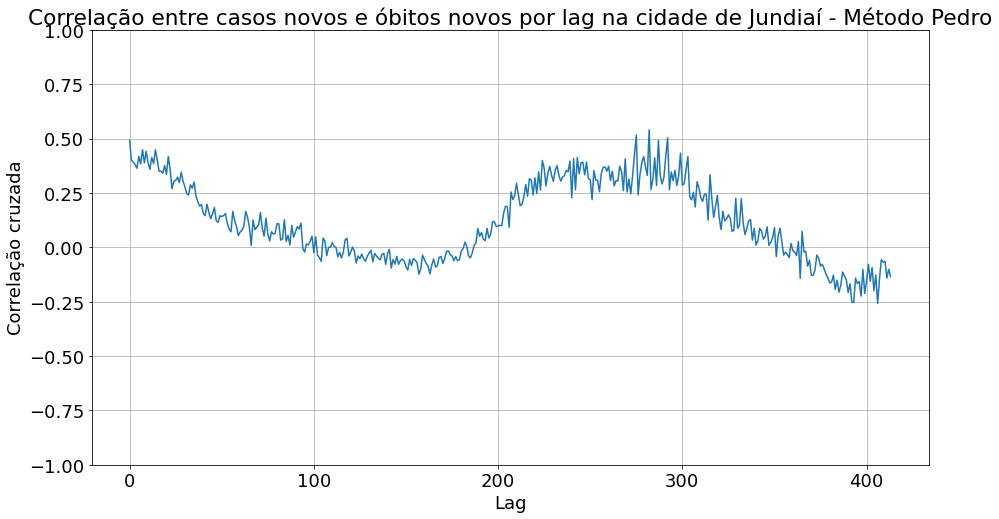

In [ ]:
y_corr = [crosscorr(dados_jund['casos_novos'], dados_jund['obitos_novos'], lag) for lag in range(0,len(dados_jund))]
x_lag = range(0,len(dados_jund))
plt.plot(x_lag, y_corr)
plt.ylim(-1,1)
plt.title('Correlação entre casos novos e óbitos novos por lag na cidade de Jundiaí - Método Pedro')
plt.xlabel('Lag')
plt.ylabel('Correlação cruzada')
plt.grid()
plt.show()

<ipython-input-65-fc780704573f>:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  ccf_out2 = smt.ccf(dados_jund.loc[:,"casos_novos"], dados_jund.loc[:,"obitos_novos"], unbiased = False)


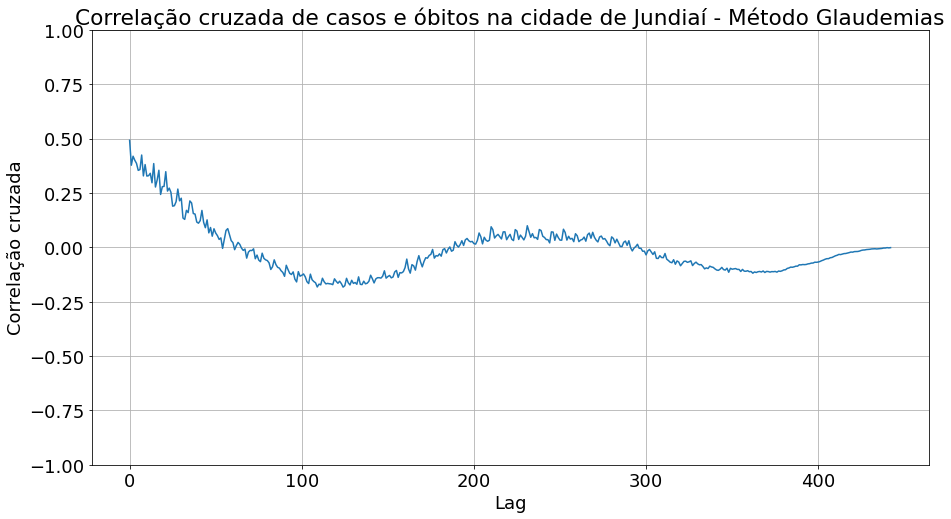

In [ ]:
ccf_out2 = smt.ccf(dados_jund.loc[:,"casos_novos"], dados_jund.loc[:,"obitos_novos"], unbiased = False)
plt.title("Correlação cruzada de casos e óbitos na cidade de Jundiaí - Método Glaudemias")
plt.plot(x_lag, ccf_out2)
plt.ylim(-1,1)
plt.ylabel("Correlação cruzada")
plt.xlabel("Lag")
plt.grid()
plt.show()